###  Analysis of which openings might give you an advantage as either white or black and moves and end board position of the best game in this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import mean

In [2]:

df=pd.read_csv("games.csv")
df.head()


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
s=df["winner"].value_counts()
print("Percentage of white wins=",s["white"]/len(df)*100)
print("Percentage of black wins=",s["black"]/len(df)*100)
print("Percentage of draws=",s["draw"]/len(df)*100)

Percentage of white wins= 49.860404826
Percentage of black wins= 45.403330342
Percentage of draws= 4.73626483199


Naturally white seems to have an edge. Always choose white xp

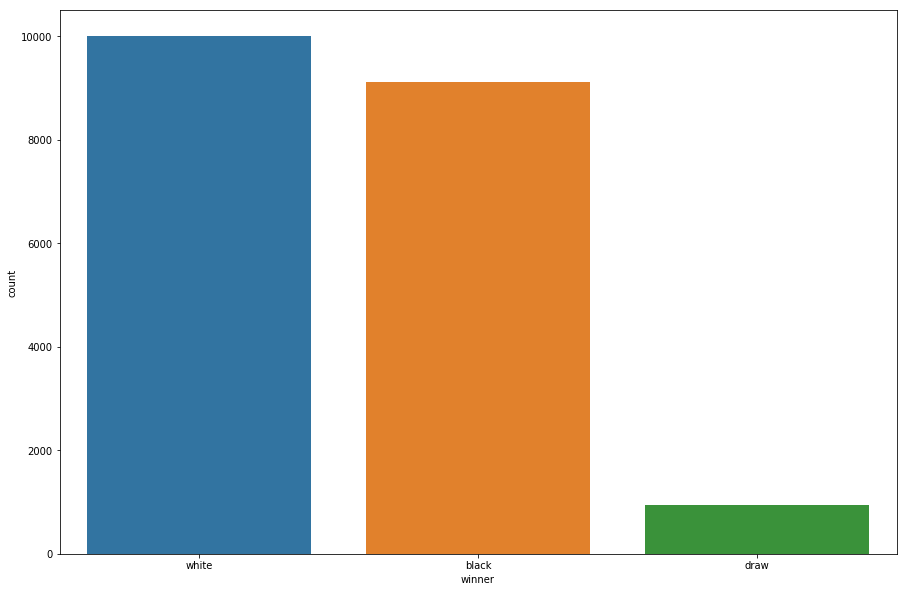

In [4]:
plt.figure(figsize=(15,10))
sb.countplot(x='winner', data=df)

In [5]:
k=df["victory_status"].value_counts()
print("Percentage of games reigned=",k["resign"]/len(df)*100)

Percentage of games reigned= 55.573835876


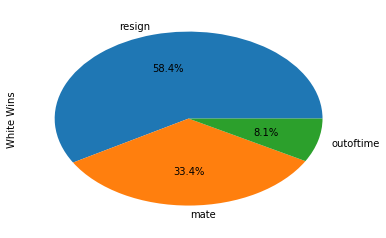

In [6]:
white = df.loc[df['winner']=='white']
black = df.loc[df['winner']=='black']
white['victory_status'].value_counts().plot.pie(autopct="%.1f%%", label="White Wins")


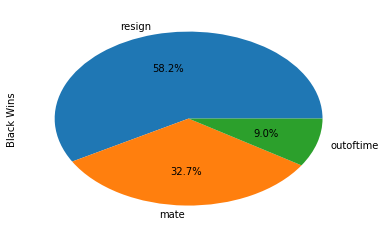

In [7]:
black['victory_status'].value_counts().plot.pie(autopct="%.1f%%", label="Black Wins")

Naturally majority of the games ended with resignation

In [18]:
WhiteTop10Openings = white['opening_name'].value_counts().nlargest(10)
WhiteTop10Openings


Scandinavian Defense: Mieses-Kotroc Variation    164
Sicilian Defense                                 149
Scotch Game                                      145
French Defense: Knight Variation                 135
Philidor Defense #3                              127
Van't Kruijs Opening                             126
Sicilian Defense: Bowdler Attack                 119
Queen's Pawn Game: Mason Attack                  116
Queen's Pawn Game: Chigorin Variation            112
Horwitz Defense                                  110
Name: opening_name, dtype: int64

Scandinavian Defense: Mieses-Kotroc Variation naturally seems to be the most useful opening with most wins with white as it is the most used opening. This might not be the case if we take into account the win percentage.

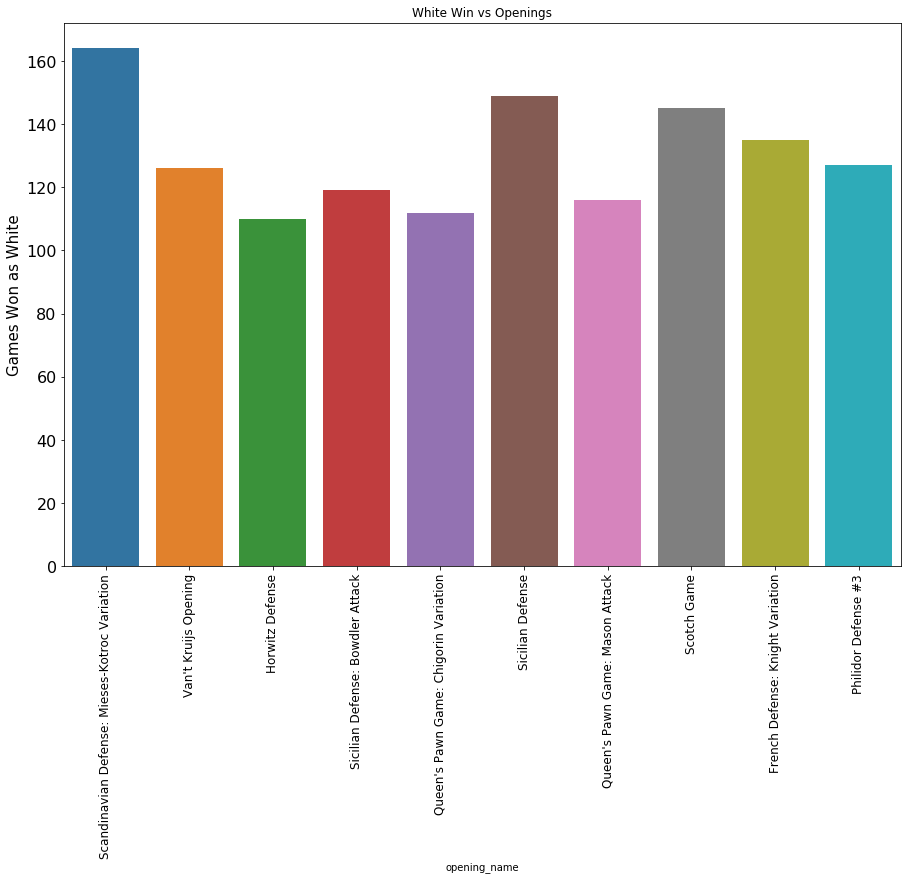

In [31]:
plt.figure(figsize=(15,10))
d1=white[white["opening_name"].isin(WhiteTop10Openings.index)]
sb.countplot(x='opening_name', data=d1)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Games Won as White", fontsize=15)
plt.yticks(fontsize=16)
plt.title("White Win vs Openings")


In [34]:
BlackTop10Openings = black['opening_name'].value_counts().nlargest(10)
BlackTop10Openings


Van't Kruijs Opening                     226
Sicilian Defense                         194
Sicilian Defense: Bowdler Attack         164
Scandinavian Defense                     123
French Defense: Knight Variation         121
Scotch Game                              115
Queen's Pawn Game: Chigorin Variation    109
Queen's Pawn Game: Mason Attack          103
Indian Game                              100
Philidor Defense #2                       96
Name: opening_name, dtype: int64

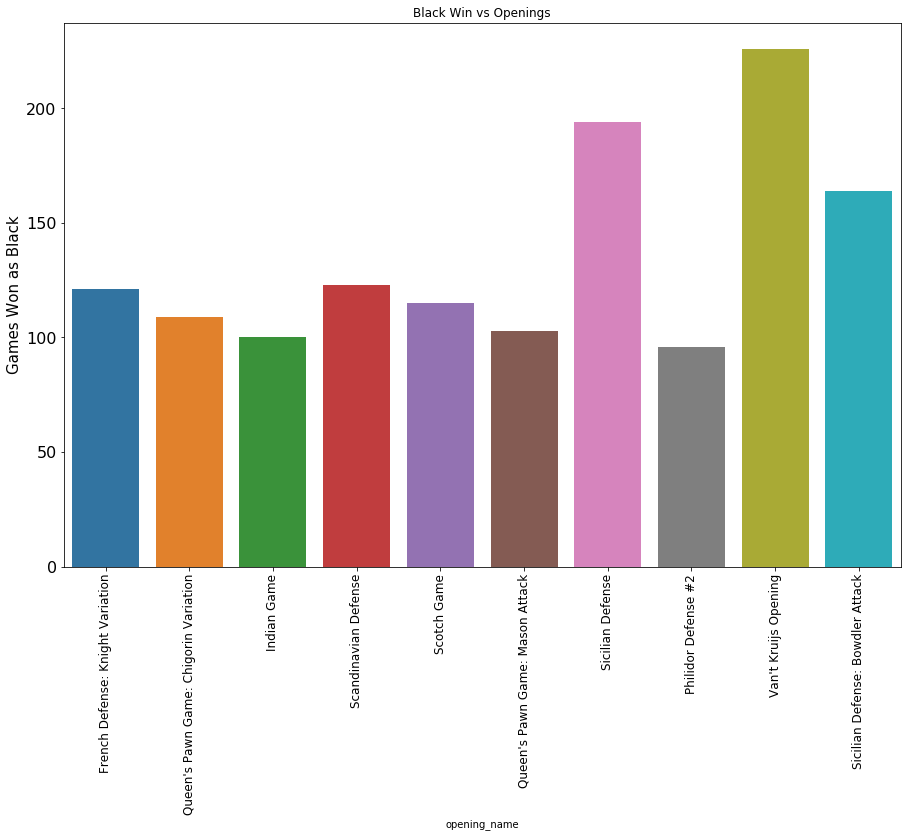

In [36]:
plt.figure(figsize=(15,10))
d2=black[black["opening_name"].isin(BlackTop10Openings.index)]
sb.countplot(x='opening_name', data=d2)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Games Won as Black", fontsize=15)
plt.yticks(fontsize=16)
plt.title("Black Win vs Openings")

Lets look at win percentages

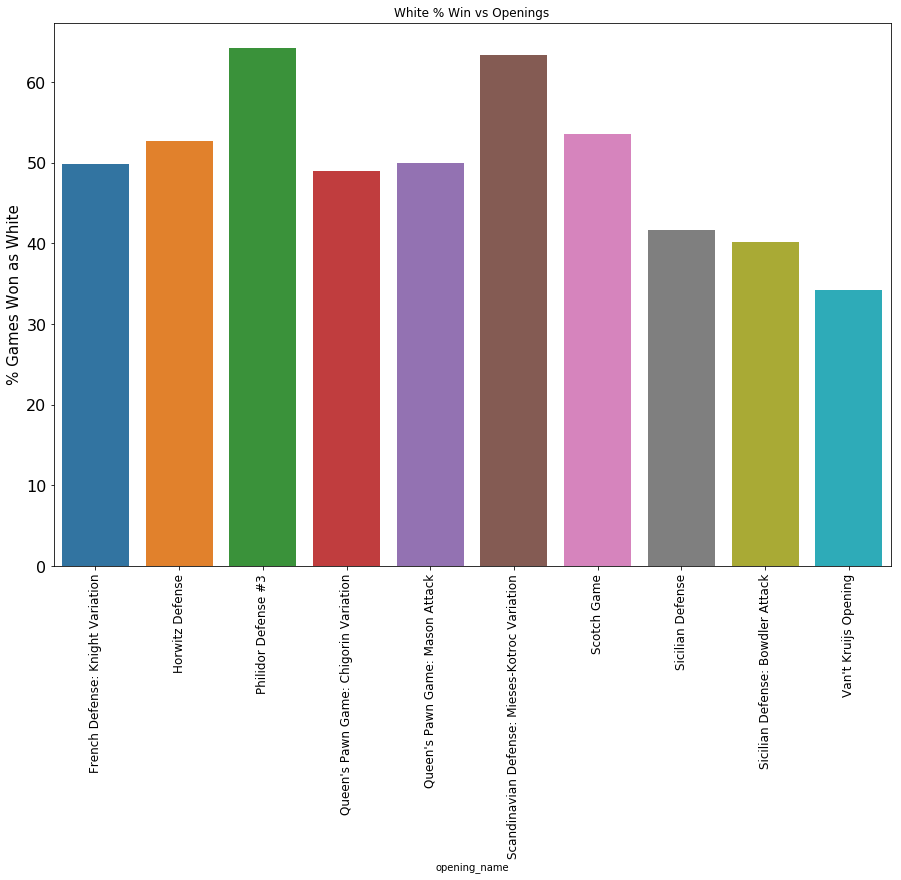

In [37]:
plt.figure(figsize=(15,10))
openingSet = df[df['opening_name'].isin(WhiteTop10Openings.index)]
boS = d1.groupby(['opening_name']).count()
oS = openingSet.groupby('opening_name').count()
perc = (boS/oS)*100
sb.barplot(x=perc.index , y=perc.id)

plt.xticks(rotation=90, fontsize=12)
plt.ylabel("% Games Won as White", fontsize=15)
plt.yticks(fontsize=16)
plt.title("White % Win vs Openings")

Clearly Philidor Defence has the best win % for white and Van't Kruijs has the worst

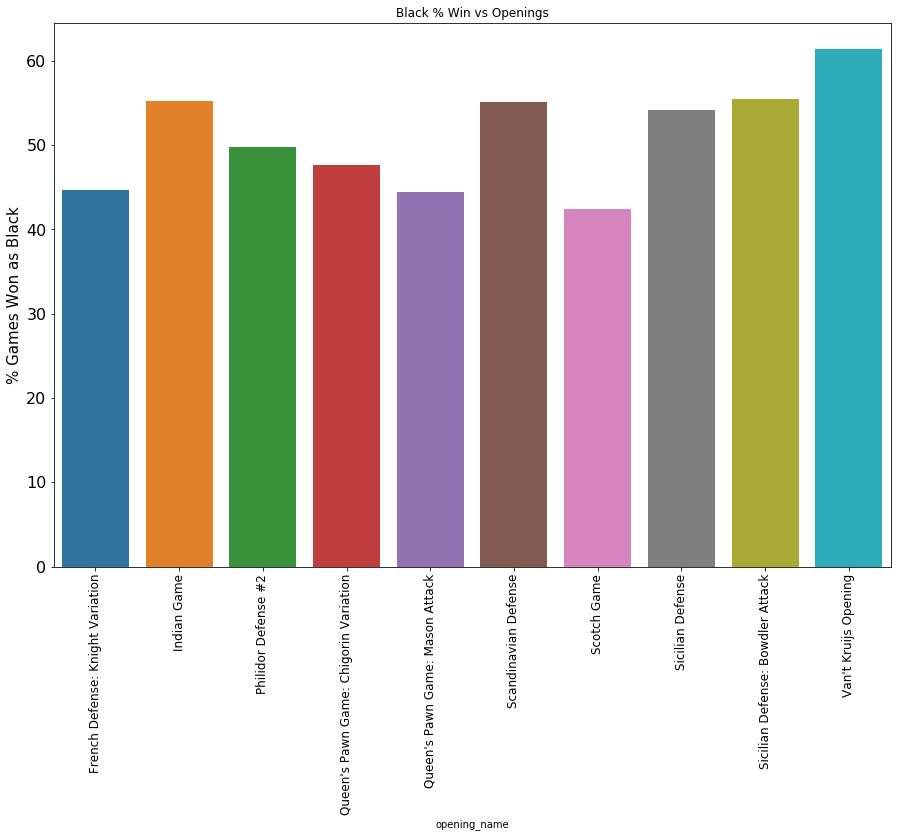

In [41]:
plt.figure(figsize=(15,10))
openingSet1 = df[df['opening_name'].isin(BlackTop10Openings.index)]
boS = d2.groupby(['opening_name']).count()
oS = openingSet1.groupby('opening_name').count()
perc1 = (boS/oS)*100
sb.barplot(x=perc1.index , y=perc.id)

plt.xticks(rotation=90, fontsize=12)
plt.ylabel("% Games Won as Black", fontsize=15)
plt.yticks(fontsize=16)
plt.title("Black % Win vs Openings")

Van't Kruijs has the best win % for black which makes sense cuz it has the worst win % for white

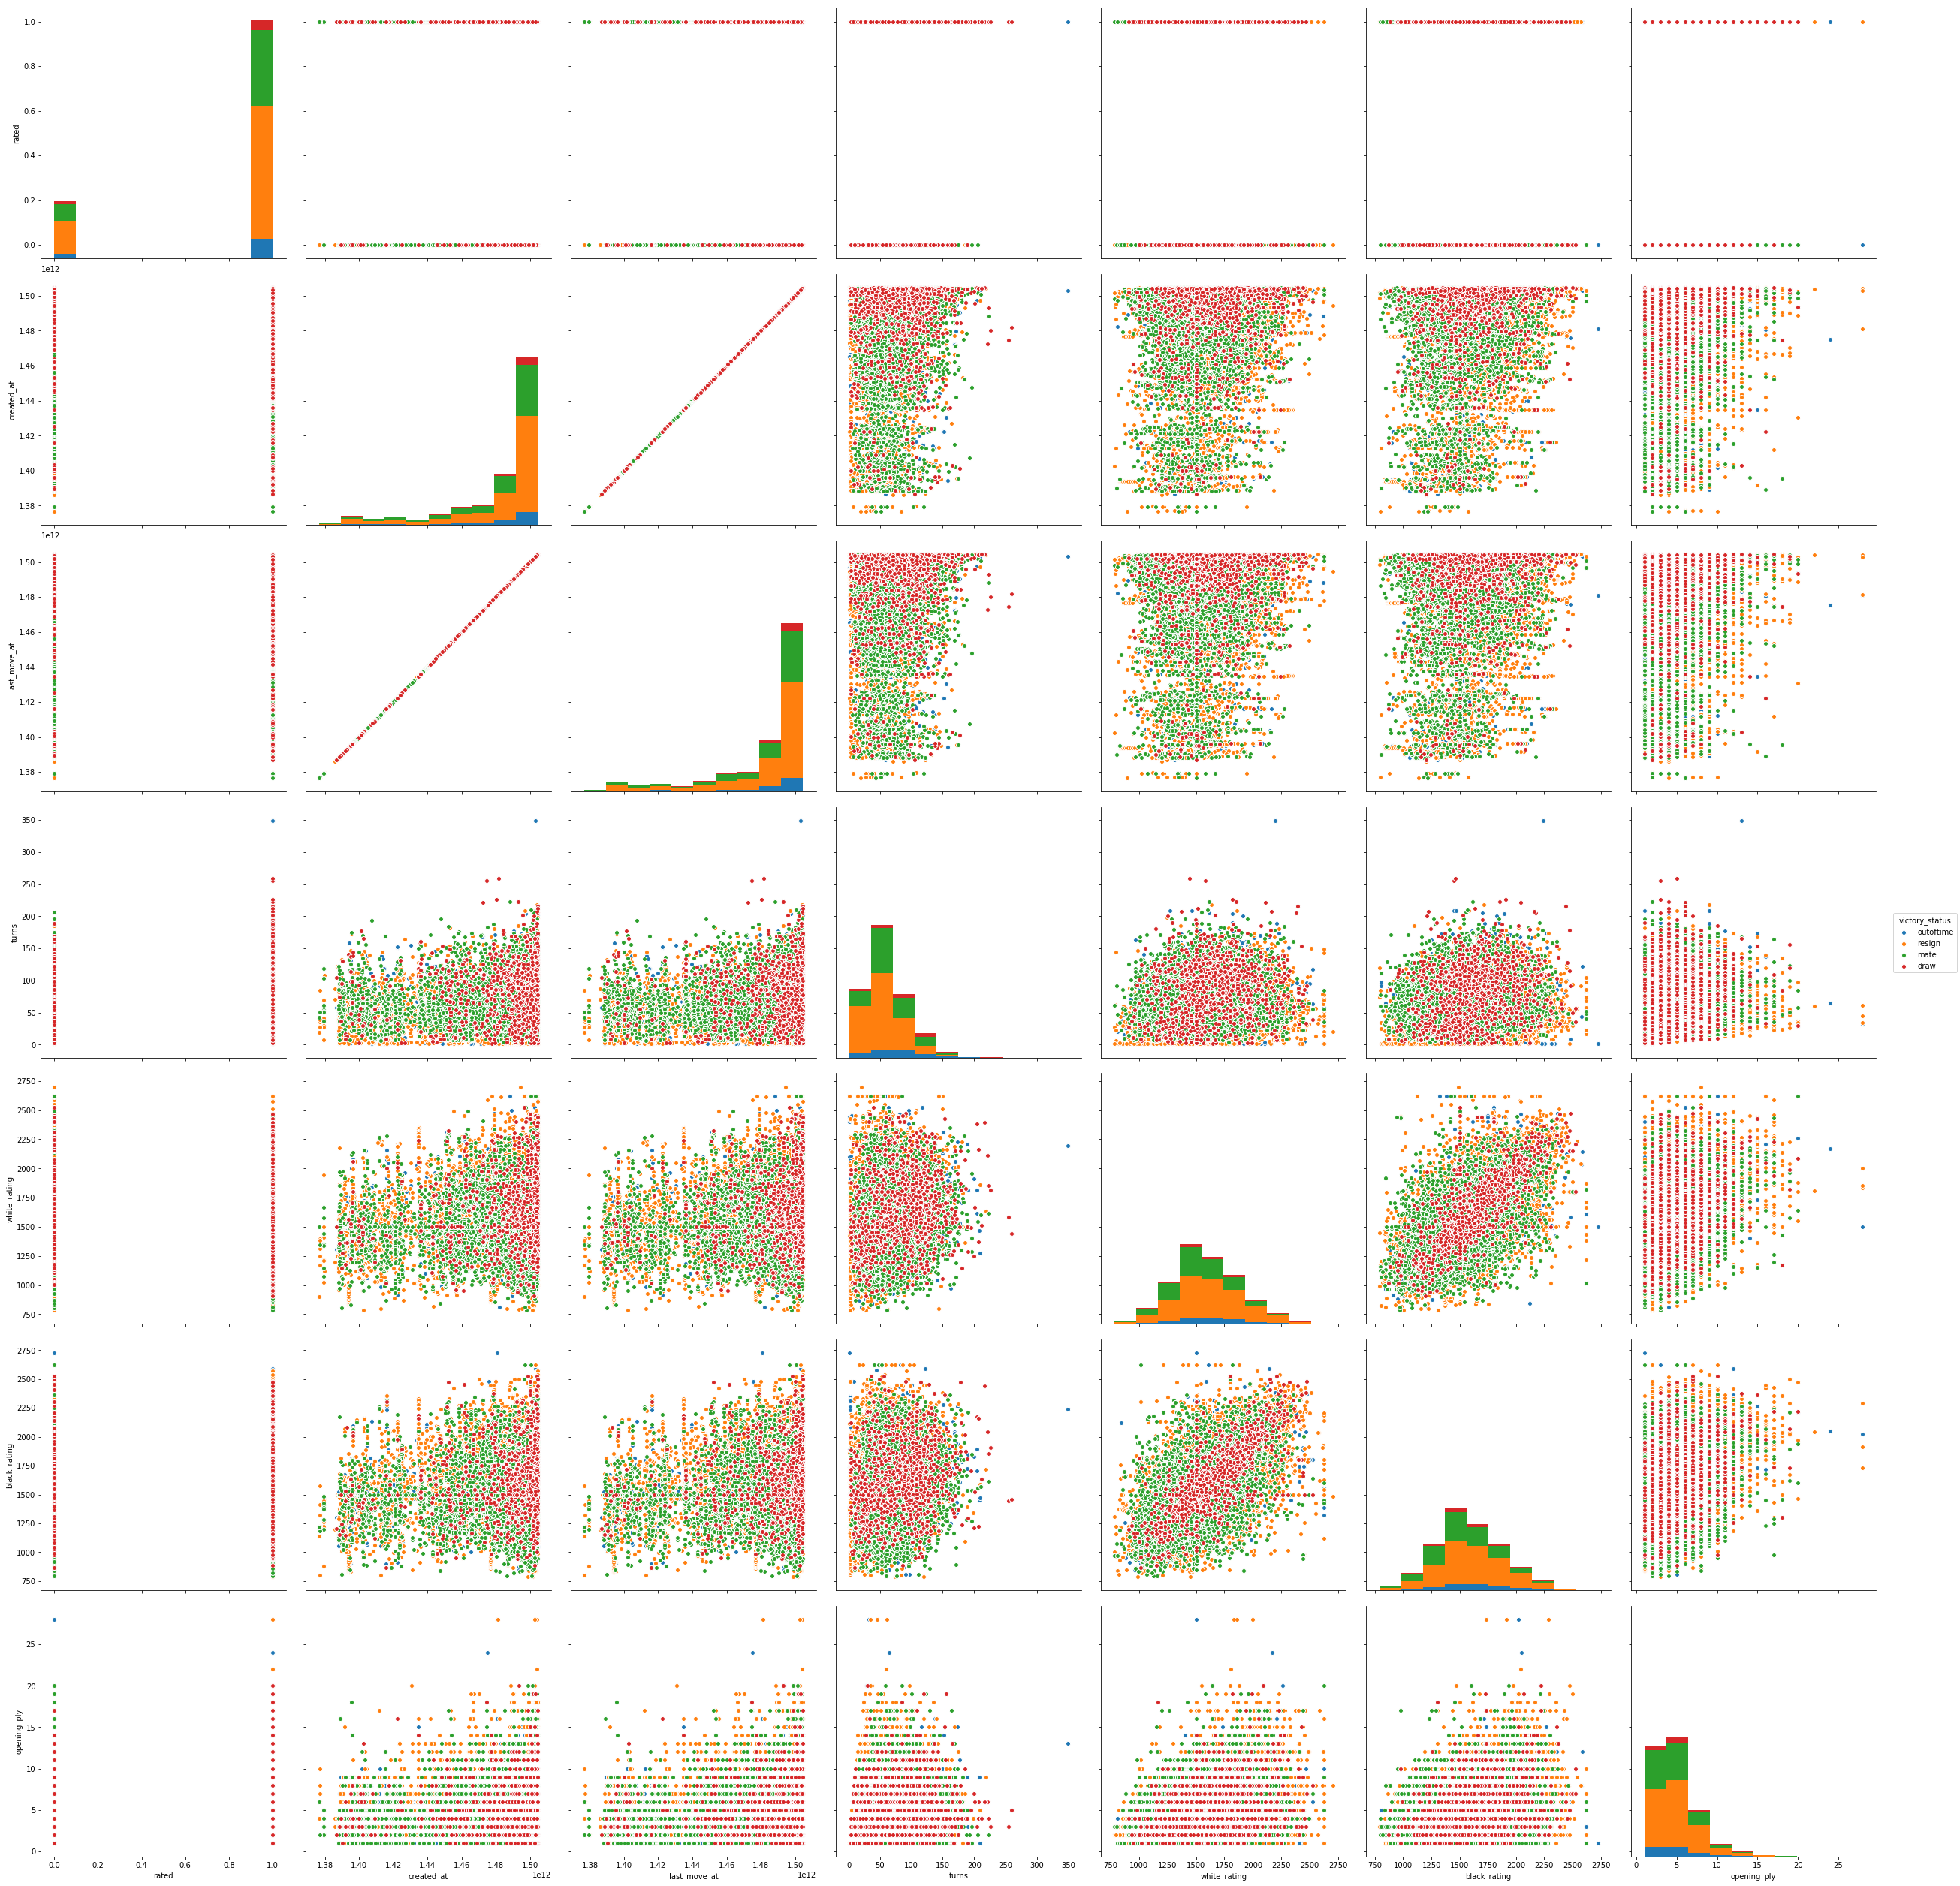

In [43]:
sb.pairplot(df, hue='victory_status', size=5);

In [48]:
df1=df[df["turns"]==df["turns"].max()]
df1

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
11554,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13
13859,pN0ioHNr,True,1.503084e+12,1.503086e+12,349,outoftime,white,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,Queen's Gambit Declined: Hastings Variation,13


In [55]:
df2=df[df["turns"]==df["turns"].min()]
df2

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
1946,3K5kYPO8,True,1.491530e+12,1.491530e+12,1,resign,black,10+0,serik-astana,1464,brorael357,1355,g3,A00,Hungarian Opening,1
1977,NfBNi0eX,False,1.491070e+12,1.491070e+12,1,outoftime,white,10+60,clarkkent89,2032,tactical_bishop,1223,e4,B00,King's Pawn,1
4115,3NQKJmJ5,False,1.500760e+12,1.500760e+12,1,outoftime,white,5+15,fairygirl,2404,oreo_or_orion,1616,e4,B00,King's Pawn,1
4473,rAO6oybn,False,1.480830e+12,1.480830e+12,1,outoftime,white,5+5,ranchowangdu,1500,justicebot,2723,e4,B00,King's Pawn,1
4828,Z1M9z44Z,True,1.472750e+12,1.472750e+12,1,resign,white,10+0,bert-w,1670,andreschil,1175,e4,B00,King's Pawn,1
5496,cbsKbsCn,False,1.465350e+12,1.465350e+12,1,outoftime,white,5+15,slowgamer,2100,ytdvvc,1404,e4,B00,King's Pawn,1
5875,Uep3ZGfD,True,1.487980e+12,1.487980e+12,1,resign,white,10+0,buglkraxnseppl,1778,kellyclarkson,1349,e4,B00,King's Pawn,1
6040,5DsE7SPq,False,1.488130e+12,1.488140e+12,1,outoftime,white,60+60,lance5500,2617,justindong,1500,Nf3,A04,Reti Opening,1
9229,xJyhfWO9,True,1.422210e+12,1.422210e+12,1,resign,white,10+0,keeperpine,1484,raesremmurd,2113,e4,B00,King's Pawn,1
11742,458qPV3q,False,1.503514e+12,1.503514e+12,1,resign,white,10+25,lance5500,2621,antons,1614,d4,A40,Queen's Pawn,1


Lets look at the final board position of the highest rated game lasting the most number of moves

In [62]:
import lichess.api
from lichess.format import PYCHESS
game = lichess.api.game("pN0ioHNr", format=PYCHESS)

print(game.end().board())


. . . . . . . .
. R . . . . . .
. . . . . p . k
. . . . . P . .
. . . . . . P .
. . . . . . K .
. . . . . . . .
r . . . . . . .


It was a fun game. You should check it out. Here are the moves.

In [61]:
game1 = lichess.api.game("pN0ioHNr")
print(game1['moves'])

d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb3 Qd8 e4 dxe4 Nxe4 Nd7 Bd3 Be7 O-O Nf6 Rfd1 O-O Qc2 Qc7 Qe2 b6 Rac1 Bb7 Nxf6+ Bxf6 d5 exd5 cxd5 c5 Qe4 g6 b3 Qd6 Bc4 Rfe8 Qg4 a6 a4 Kg7 Nd2 Bc8 Qf3 Bf5 h3 h5 Bd3 Bxd3 Qxd3 Qe5 Nc4 Qb8 d6 b5 axb5 axb5 Ne3 Bd4 Nc2 Qxd6 Nxd4 cxd4 Qxd4+ Qxd4 Rxd4 Red8 Rxd8 Rxd8 Rc5 Rd1+ Kh2 Rd2 f3 b4 Rc4 Rb2 Rxb4 h4 Rxh4 Rxb3 Kg3 g5 Rc4 Kg6 h4 gxh4+ Rxh4 Rb2 Rc4 f6 Rc5 Rb4 Kh3 Rd4 Kh2 Rb4 Kh1 Rb1+ Kh2 Rb4 Kg1 Rb2 Kf1 Ra2 Rb5 Rc2 Rd5 Ra2 Kg1 Rb2 Kh1 Rb1+ Kh2 Rb4 Kh3 Rc4 Ra5 Rb4 Kg3 Rc4 Kf2 Rc3 Kf1 Rc2 Kg1 Rb2 Kh1 Rc2 Kh2 Rb2 Kh3 Rb4 Kg3 Rc4 Ra8 Rb4 Rc8 Rd4 Rc7 Rb4 Kh2 Rd4 Kh3 Rb4 Kg3 Rd4 Kf2 Rd3 Kf1 Rd2 Kg1 Rb2 Kh1 Rd2 Kh2 Rb2 Kh3 Rb4 Kg3 Rd4 Rc8 Rb4 Rd8 Rc4 Kh3 Rb4 Rg8+ Kf7 Rh8 Kg6 Rd8 Rc4 Rd1 Rb4 Kh2 Rc4 Kh1 Rb4 Kg1 Rb2 Kh2 Rb4 Kh3 Rc4 Re1 Rb4 g3 Rc4 Rf1 Rb4 Rf2 Rc4 Re2 Rb4 Kg2 Rc4 Kf2 Rc3 Rd2 Rb3 Ra2 Rc3 Rb2 Ra3 Rd2 Rc3 Kg2 Rb3 Rd8 Rc3 Ra8 Rb3 Ra7 Rc3 Ra6 Rb3 Ra5 Rc3 Ra4 Rb3 Ra2 Rc3 Ra1 Rb3 Rc1 Rd3 Re1 Rc3 Re8 Rd3 Rg8+ Kf7 Rh8 Kg7 Rh4 Kg6 Rg4+ Kf7 Ra4 Kg6 Kf2